<a href="https://colab.research.google.com/github/JP109/Assignment/blob/main/Sporty_Guru_Internship_assignment_by_JAI_PAWAR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Imports

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

### Load Data

In [2]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

170508288/170498071 [==============================] - 11s 0us/step


### Define Config variables

In [13]:
EPOCHS = 50
IMAGE_SHAPE = 32
IMAGE_CHANNELS = 3

### Net A

In [15]:
class NetA():
  """Instantiates netA with only a Flatten and Dense layer"""
  def __init__(self):
    self.model = None
    self.create_model()

  def create_model(self):
    input = tf.keras.layers.Input(shape=(IMAGE_SHAPE,IMAGE_SHAPE,IMAGE_CHANNELS))
    x = tf.keras.layers.Flatten()(input)
    x = tf.keras.layers.Dense(10)(x)

    self.model = tf.keras.models.Model(inputs=input, outputs=x)

Model: "model_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 flatten_5 (Flatten)         (None, 3072)              0         
                                                                 
 dense_5 (Dense)             (None, 10)                30730     
                                                                 
Total params: 30,730
Trainable params: 30,730
Non-trainable params: 0
_________________________________________________________________


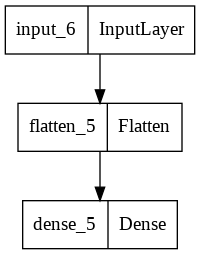

In [16]:
# Peek at model
netA = NetA()
netA.model.summary()
tf.keras.utils.plot_model(netA.model)

In [19]:
# Compile model
netA.model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=['accuracy'])

In [20]:
# Train model
history_netA = netA.model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=EPOCHS, verbose=1)

Epoch 1/50
1563/1563 [==============================] - 8s 5ms/step - loss: 14.5064 - accuracy: 0.1000 - val_loss: 14.5063 - val_accuracy: 0.1000
Epoch 2/50
1563/1563 [==============================] - 7s 5ms/step - loss: 14.5064 - accuracy: 0.1000 - val_loss: 14.5063 - val_accuracy: 0.1000
Epoch 3/50
1563/1563 [==============================] - 9s 6ms/step - loss: 14.5064 - accuracy: 0.1000 - val_loss: 14.5063 - val_accuracy: 0.1000
Epoch 4/50
1563/1563 [==============================] - 7s 5ms/step - loss: 14.5064 - accuracy: 0.1000 - val_loss: 14.5063 - val_accuracy: 0.1000
Epoch 5/50
1563/1563 [==============================] - 6s 4ms/step - loss: 14.5064 - accuracy: 0.1000 - val_loss: 14.5063 - val_accuracy: 0.1000
Epoch 6/50
1563/1563 [==============================] - 6s 4ms/step - loss: 14.5064 - accuracy: 0.1000 - val_loss: 14.5063 - val_accuracy: 0.1000
Epoch 7/50
1563/1563 [==============================] - 6s 4ms/step - loss: 14.5064 - accuracy: 0.1000 - val_loss: 14.5063 -

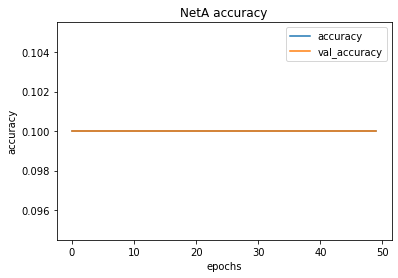

In [21]:
# Plot metrics
fig = plt.figure()
ax = plt.axes()

ax.plot(history_netA.history['accuracy'], label='accuracy')
ax.plot(history_netA.history['val_accuracy'], label='val_accuracy')
ax.set_title('NetA accuracy')
ax.set_xlabel('epochs')
ax.set_ylabel('accuracy')
ax.legend()

### Net B

In [22]:
class NetB():
  """Instantiates netB with a Flatten layer and two Dense layers"""
  def __init__(self):
    self.model = self.create_model()
    self.create_model()

  def create_model(self):
    input = tf.keras.layers.Input(shape=(32,32,3))
    x = tf.keras.layers.Flatten()(input)
    x = tf.keras.layers.Dense(300, activation="relu")(x)
    x = tf.keras.layers.Dense(10, activation='softmax')(x)

    self.model = tf.keras.models.Model(inputs=input, outputs=x)

Model: "model_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_8 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 flatten_7 (Flatten)         (None, 3072)              0         
                                                                 
 dense_8 (Dense)             (None, 300)               921900    
                                                                 
 dense_9 (Dense)             (None, 10)                3010      
                                                                 
Total params: 924,910
Trainable params: 924,910
Non-trainable params: 0
_________________________________________________________________


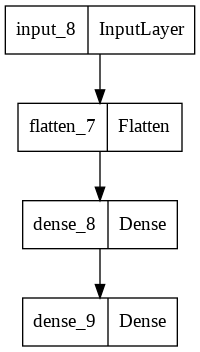

In [23]:
# Peek at model
netB = NetB()
netB.model.summary()
tf.keras.utils.plot_model(netB.model)

In [24]:
# Reload data
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

In [25]:
# Compile model
netB.model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=['accuracy'])

In [26]:
# Train model
history_netB = netB.model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=50, verbose=1)

Epoch 1/50
1563/1563 [==============================] - 21s 13ms/step - loss: 13.4715 - accuracy: 0.0986 - val_loss: 2.3050 - val_accuracy: 0.1000
Epoch 2/50
1563/1563 [==============================] - 20s 13ms/step - loss: 2.3038 - accuracy: 0.1000 - val_loss: 2.3052 - val_accuracy: 0.0997
Epoch 3/50
1563/1563 [==============================] - 26s 16ms/step - loss: 2.3026 - accuracy: 0.0988 - val_loss: 2.3045 - val_accuracy: 0.1000
Epoch 4/50
1563/1563 [==============================] - 22s 14ms/step - loss: 2.3029 - accuracy: 0.0978 - val_loss: 2.3045 - val_accuracy: 0.1000
Epoch 5/50
1563/1563 [==============================] - 27s 18ms/step - loss: 2.3027 - accuracy: 0.1003 - val_loss: 2.3044 - val_accuracy: 0.1000
Epoch 6/50
1563/1563 [==============================] - 24s 15ms/step - loss: 2.3027 - accuracy: 0.0985 - val_loss: 2.3045 - val_accuracy: 0.1000
Epoch 7/50
1563/1563 [==============================] - 22s 14ms/step - loss: 2.3027 - accuracy: 0.0995 - val_loss: 2.3046 

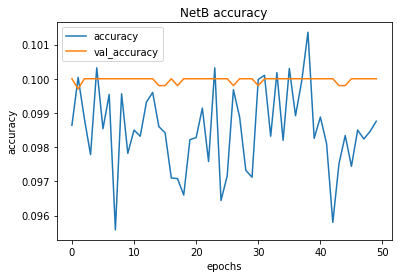

In [27]:
# Plot matrics
fig = plt.figure()
ax = plt.axes()

ax.plot(history_netB.history['accuracy'], label='accuracy')
ax.plot(history_netB.history['val_accuracy'], label='val_accuracy')
ax.set_title('NetB accuracy')
ax.set_xlabel('epochs')
ax.set_ylabel('accuracy')
ax.legend()

### Net C

In [28]:
class NetC():
  """Instantiates a model with a Convolutional, Pooling, Flatten and Dense layer."""
  def __init__(self):
    self.model = self.create_model()
    # self.create_model()

  def create_model(self):
    input = tf.keras.layers.Input(shape=(32,32,3))
    x = tf.keras.layers.Conv2D(filters=25, kernel_size=5, activation="relu")(input)
    x = tf.keras.layers.MaxPooling2D(pool_size=2, strides=2)(x)
    x = tf.keras.layers.Flatten()(x)
    x = tf.keras.layers.Dense(10, activation='softmax')(x)

    return tf.keras.models.Model(inputs=input, outputs=x)

Model: "model_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_9 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv2d (Conv2D)             (None, 28, 28, 25)        1900      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 25)       0         
 )                                                               
                                                                 
 flatten_8 (Flatten)         (None, 4900)              0         
                                                                 
 dense_10 (Dense)            (None, 10)                49010     
                                                                 
Total params: 50,910
Trainable params: 50,910
Non-trainable params: 0
_______________________________________________________

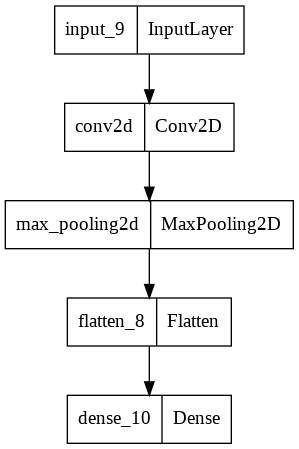

In [29]:
# Peek at model
netC = NetC()
netC.model.summary()
tf.keras.utils.plot_model(netC.model)

In [30]:
# Reload data
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

In [31]:
# Compile model
netC.model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=['accuracy'])

In [32]:
# Train model
history_netC = netC.model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=50, verbose=1)

Epoch 1/50
1563/1563 [==============================] - 48s 31ms/step - loss: 2.7933 - accuracy: 0.1353 - val_loss: 2.3005 - val_accuracy: 0.1096
Epoch 2/50
1563/1563 [==============================] - 48s 30ms/step - loss: 2.2322 - accuracy: 0.1693 - val_loss: 2.3076 - val_accuracy: 0.1134
Epoch 3/50
1563/1563 [==============================] - 47s 30ms/step - loss: 2.1650 - accuracy: 0.2043 - val_loss: 2.2286 - val_accuracy: 0.1600
Epoch 4/50
1563/1563 [==============================] - 46s 30ms/step - loss: 2.0978 - accuracy: 0.2333 - val_loss: 2.1752 - val_accuracy: 0.2374
Epoch 5/50
1563/1563 [==============================] - 47s 30ms/step - loss: 2.0449 - accuracy: 0.2528 - val_loss: 2.1724 - val_accuracy: 0.2542
Epoch 6/50
1563/1563 [==============================] - 47s 30ms/step - loss: 2.0092 - accuracy: 0.2671 - val_loss: 2.1147 - val_accuracy: 0.2585
Epoch 7/50
1563/1563 [==============================] - 48s 30ms/step - loss: 1.9496 - accuracy: 0.2898 - val_loss: 2.2330 -

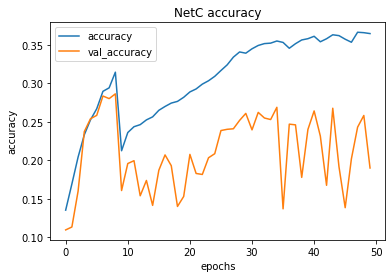

In [33]:
# Plot metrics
fig = plt.figure()
ax = plt.axes()

ax.plot(history_netC.history['accuracy'], label='accuracy')
ax.plot(history_netC.history['val_accuracy'], label='val_accuracy')
ax.set_title('NetC accuracy')
ax.set_xlabel('epochs')
ax.set_ylabel('accuracy')
ax.legend()

### Comparing models

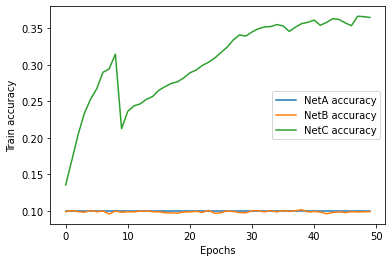

In [34]:
histories = [history_netA, history_netB, history_netC]

fig = plt.figure()
ax = plt.axes()
ax.plot(history_netA.history['val_accuracy'], label='NetA accuracy')
ax.plot(history_netB.history['val_accuracy'], label='NetB accuracy')
ax.plot(history_netC.history['val_accuracy'], label='NetC accuracy')
ax.set_xlabel('Epochs')
ax.set_ylabel('Test accuracy')
ax.legend()